# Demonstration of Dynamic Network Weighting

TODO: Consider changing title. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from typing import Dict

import sys
sys.path.append("..")

## Background

* There are three *groups* of NFTS: Red, Blue, and Yellow.
* Within each group, there are two different types of NFTs, numbered 1 and 2. So there are $RED_1$, $RED_2$, $BLUE_1$, etc. 
* Each eligible voter holds at least one of these NFTs. 
* Overall, Red NFTs are rarest and represent the most value. Comparatively, Blue and Yellow NFTs are easier to get. 
* However, there is no requirement that the two types of NFTs within a given 
* The *cweight* of an individual credential is defined to be 
$cweight = \text{Number of Credential Holders} \times \text{Credential Weight}$.
* The *cweight* of a group of NFTs is just the sum of the *cweight* of each individual credential. 
* **Fundamental Property:** For this example, the cweights should satisfy:
$$ Red cweight \geq Blue cweight = Yellow cweight.$$ This reflects the greater insight of Red NFT holders in the community. 

## Accessing Credential Information

### Background 
To begin, we need data about the voters and their credentials (e.g. NFTs and tokens). 

This is input in the form of a .csv file with
* a column called `voter` that contains voter IDs (e.g. wallet addresses)
*  columns are **RED**, **BLUE**, and **YELLOW** 
* each entry is either 1 or 0, corresponding to ownership or non-ownership of the particular NFT. 

### Mechanics 
1. Make sure that this .ipynb file is in the same directory as the voter data. 
2. To use your own data, change the value of `VOTER_INFO_FILE` from `default_voter_data.csv` to the string of your own filename. 

In [2]:
# Code to read in a file 
VOTER_INFO_FILE = "data/default_voter_data.csv"

In [3]:
## Accessing Credential Information


In [4]:
# Read Initial Data From csv file
voter_cred_df = pd.read_csv(VOTER_INFO_FILE, index_col = 'voter')

#TODO: Move to uilts for processing
def voter_cred_df_to_dict(voter_cred_df: pd.DataFrame) -> Dict[str, Dict[str, float]]:
    voter_cred_dict = {}
    for voter in list(voter_cred_df.index):
        voter_cred_dict[voter] = {}
        for cred in list(voter_cred_df.columns):
            voter_cred_dict[voter][cred] = voter_cred_df.at[voter,cred]
    return voter_cred_dict

In [5]:
voter_cred_dict = voter_cred_df_to_dict(voter_cred_df)
voter_cred_dict

{'voter_0': {'red_1': 0,
  'red_2': 1,
  'blue_1': 1,
  'blue_2': 1,
  'yellow_1': 0,
  'yellow_2': 1},
 'voter_1': {'red_1': 1,
  'red_2': 0,
  'blue_1': 0,
  'blue_2': 0,
  'yellow_1': 0,
  'yellow_2': 0},
 'voter_2': {'red_1': 0,
  'red_2': 0,
  'blue_1': 0,
  'blue_2': 0,
  'yellow_1': 0,
  'yellow_2': 1},
 'voter_3': {'red_1': 0,
  'red_2': 0,
  'blue_1': 1,
  'blue_2': 0,
  'yellow_1': 1,
  'yellow_2': 0},
 'voter_4': {'red_1': 0,
  'red_2': 0,
  'blue_1': 1,
  'blue_2': 0,
  'yellow_1': 0,
  'yellow_2': 1}}

## Assigning Initial Weights

One way to get started is to assign some initial weights to get the process started, to indicate domain expert knowledge of relative importance. 

By default, all weights are set equal to 1.0. To change this, type new values in the textbox. 

In [6]:
from ipywidgets import FloatText, HTML, Button, HBox, VBox

total_weight = 0

weights = {}
weights["red_1"] = FloatText(description='red_1', value=1.0, layout={'width': '200px'})
weights["blue_1"] = FloatText(description='blue_1', value=1.0, layout={'width': '200px'})
weights["yellow_1"] = FloatText(description='yellow_1', value=1.0, layout={'width': '200px'})
weights["red_2"] = FloatText(description='red_2', value=1.0, layout={'width': '200px'})
weights["blue_2"] = FloatText(description='blue_2', value=1.0, layout={'width': '200px'})
weights["yellow_2"] = FloatText(description='yellow_2', value=1.0, layout={'width': '200px'})
total_weight_widget = HTML(value=f"Total weight: {total_weight}")



def update_total_weight(b):
    total_weight = sum(weight.value for weight in weights.values())
    total_weight_widget.value = f"Total weight: {total_weight}"

# Add a title for the widget box
title_widget = HTML(value="<h2> Assign Weights Below </h2>")

# Create two columns for weights
weights_column_1 = VBox([weights["red_1"], weights["blue_1"], weights["yellow_1"]])
weights_column_2 = VBox([weights["red_2"], weights["blue_2"], weights["yellow_2"]])  # This column is intentionally left empty to maintain the two-column layout
weights_columns = HBox([weights_column_1, weights_column_2])

# Create a box for the update button and total weight display
update_total_weight_box = VBox([Button(description="Update Total Weight", on_click=update_total_weight), HTML(value="Total weight:")])

# Combine the weights columns and the update box
combined_widget_box = VBox([title_widget, weights_columns, update_total_weight_box])
display(combined_widget_box)

# TODO: Make it so the total weight value updates on the button click. 
# TODO: Add a table summarizing relative weights. 

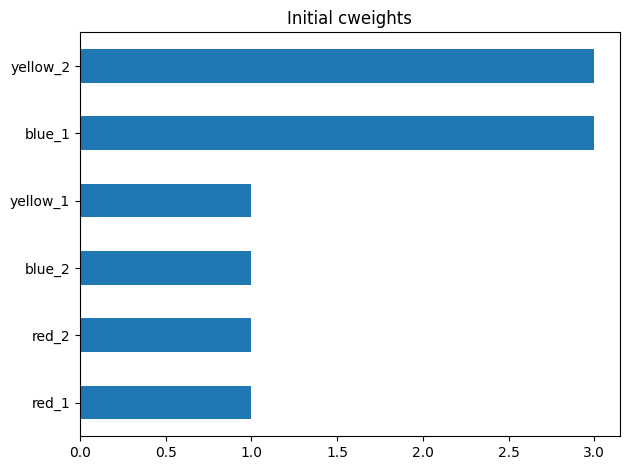

In [10]:

# Plot Initial Weights

cweight_values = [voter_cred_df[col].sum() * weights.get(col).value 
                  for col in voter_cred_df.columns]
cweight_values_array = np.array(cweight_values)
cred_names = list(voter_cred_df.columns)

initial_cweights = pd.Series(
    cweight_values_array, index=cred_names
).sort_values(ascending=True)

ax = initial_cweights.plot(kind='barh')
ax.set_title("Initial cweights")
ax.figure.tight_layout()

In [17]:
def calculate_cweight_totals(color_creds, initial_cweights):
    return {
        color: initial_cweights[creds].sum() for color, creds in color_creds.items()
    }

# Example usage
color_creds = {
    "red": ["red_1", "red_2"],
    "blue": ["blue_1", "blue_2"],
    "yellow": ["yellow_1", "yellow_2"]
}

initial_cweights_totals = calculate_cweight_totals(color_creds, initial_cweights)

plt.figure(figsize=(10, 8))
plt.pie(initial_cweights_totals.values(), labels=initial_cweights_totals.keys(), autopct='%1.1f%%')
plt.title('Initial cweights Totals')
plt.show()


NameError: name 'plt' is not defined

## Re-weighting to Achieve Desired Properties 



## Visualizing Impact of Re-weighting

TODO 

## Choosing a Voting Mechanism

TODO 

## Requirement Analysis

TODO 